In [2]:
# 데이터 불러오기 및 전처리
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform

# 그래프에 한글이 깨지지 않도록 'Malgun Gothic' 사용
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기
df = pd.read_csv(r"C:\skproject\pyproject\Mall_Customers.csv")

# CustomerID는 제외하기(의미 없는 것 같아서)
df.drop(columns=['CustomerID'], inplace=True)
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [14]:
# 데이터 기본 정보 확인
# 데이터 타입, 결측치 유무, 컬럼 수 등 파악
df.info()
df.isnull().sum()

#데이터셋은 200명의 고객 정보가 들어 있고
#성별 + 나이 + 연소득 + 소비 점수가 포함되어 있으며
#누락된 데이터 없어서 분석하기 좋은 상태

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Gender                  200 non-null    object  
 1   Age                     200 non-null    int64   
 2   Annual Income (k$)      200 non-null    int64   
 3   Spending Score (1-100)  200 non-null    int64   
 4   AgeGroup                200 non-null    category
dtypes: category(1), int64(3), object(1)
memory usage: 6.8+ KB


Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
AgeGroup                  0
dtype: int64

In [4]:
# 수치형 데이터의 통계 요약
# 평균, 표준편차, 사분위수 확인
df.describe()


,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


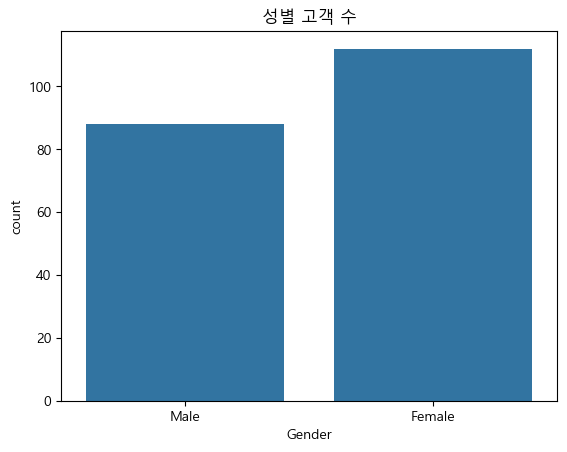

In [5]:
# 성별 분포 시각화
# 남성과 여성 고객 수 시각적으로 확인
# 성별 분포
sns.countplot(x='Gender', data=df)
plt.title('성별 고객 수')
plt.show()


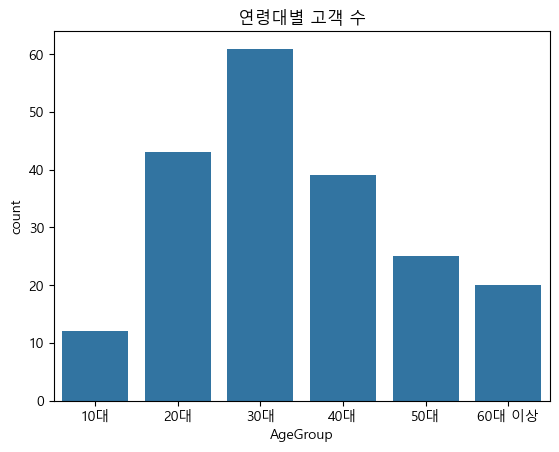

In [6]:
# 연령대 구간화, 분포 시각화
# 나이를 구간화하여 연령대별 고객 수 확인
# 연령대 구간 생성
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 19, 29, 39, 49, 59, 100],
                        labels=['10대', '20대', '30대', '40대', '50대', '60대 이상'])

# 연령대별 고객 수 시각화
sns.countplot(x='AgeGroup', data=df, order=df['AgeGroup'].value_counts().sort_index().index)
plt.title('연령대별 고객 수')
plt.show()


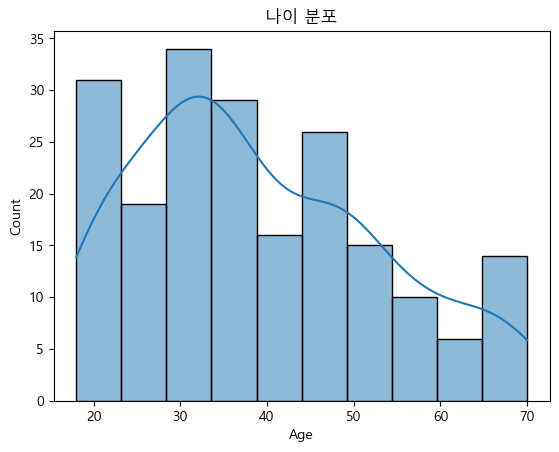

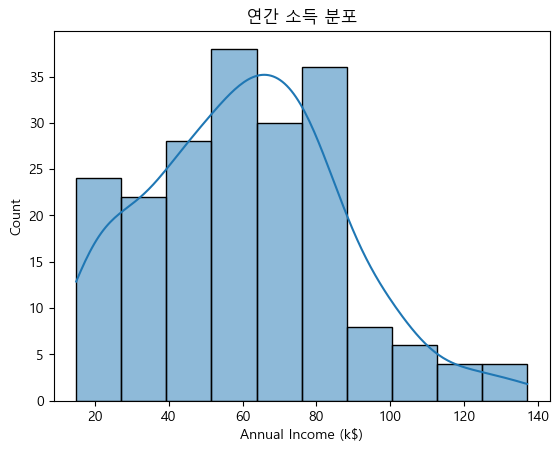

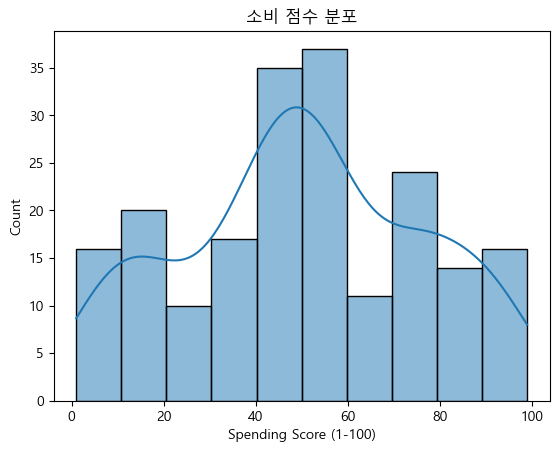

In [7]:
# 나이 분포 확인
# 연령 분포가 어느 구간에 집중되는지 확인
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('나이 분포')
plt.show()

sns.histplot(df['Annual Income (k$)'], bins=10, kde=True)
plt.title('연간 소득 분포')
plt.show()

sns.histplot(df['Spending Score (1-100)'], bins=10, kde=True)
plt.title('소비 점수 분포')
plt.show()


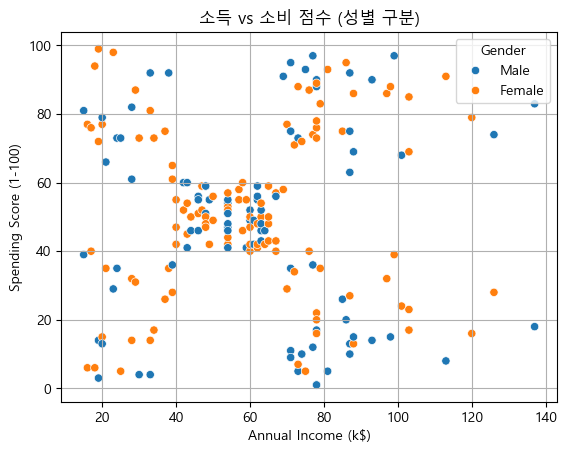

In [8]:
# 소득과 소비 점수 간의 관계
# 소득이 소비 성향에 어떤 영향을 미치는지 확인
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title('소득 vs 소비 점수 (성별 구분)')
plt.grid(True)
plt.show()


In [9]:
# 연령대별 평균 소비 점수 계산
# 연령대가 높아질수록 소비 성향이 어떻게 변하는지 분석
df.groupby('AgeGroup')['Spending Score (1-100)'].mean()


C:\Users\User\AppData\Local\Temp\ipykernel_12136\3247986750.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('AgeGroup')['Spending Score (1-100)'].mean()


AgeGroup
10대       46.500000
20대       61.953488
30대       61.098361
40대       34.948718
50대       34.720000
60대 이상    43.000000
Name: Spending Score (1-100), dtype: float64

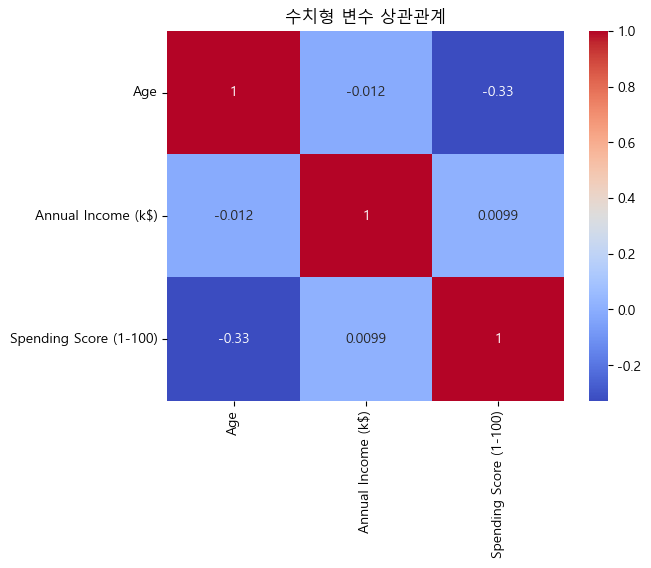

In [10]:
# 수치형 변수 간 상관관계 분석
# 변수 간 상관성을 시각적으로 확인
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('수치형 변수 상관관계')
plt.show()


### 나이 많은 사람들은 왜 소비 점수가 낮을까?
고소득이 반드시 고소비로 이어지는 것은 아니다

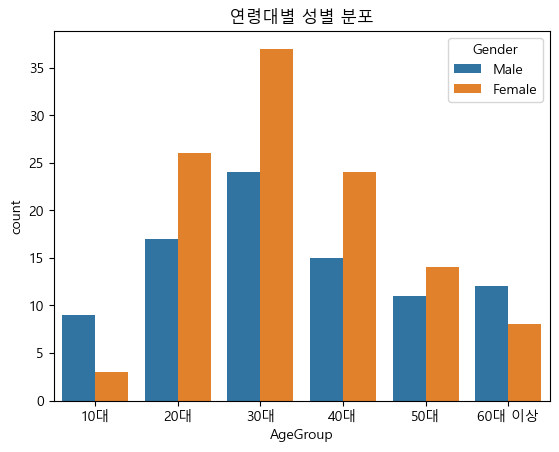

In [11]:
# 연령대별 성별 분포 시각화
# 특정 연령대에 남녀 비율이 치우쳐 있는지 확인
# 성별 + 연령대별 Count Plot (범주형 변수 분포 시각화)
sns.countplot(data=df, x='AgeGroup', hue='Gender')
plt.title('연령대별 성별 분포')
plt.show()


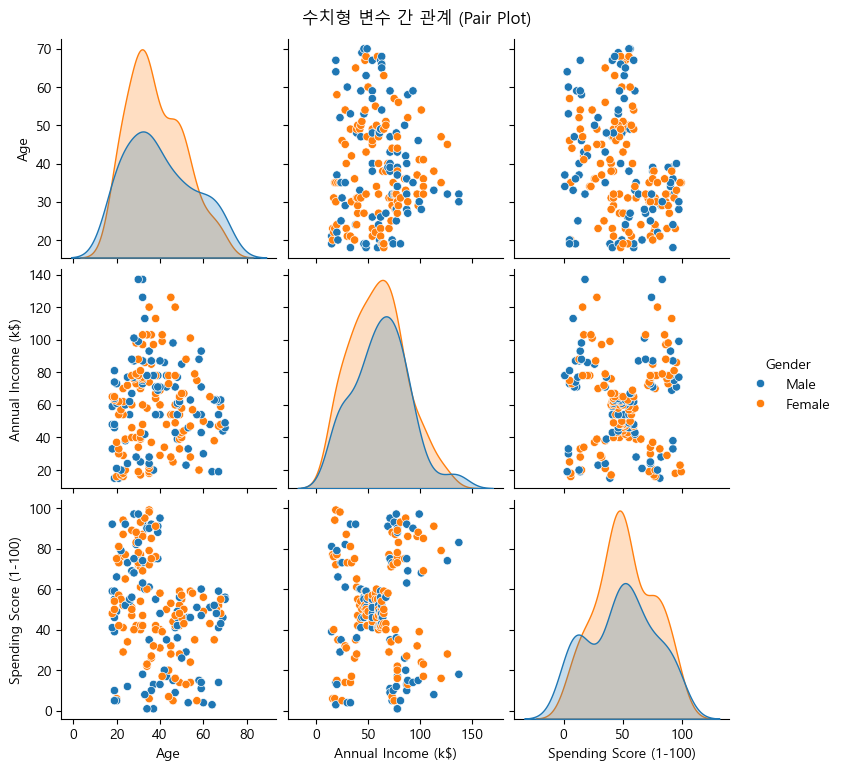

In [12]:
# 수치형 변수 간 관계 시각화 (Pair Plot)
# 나이, 소득, 소비 간의 전체적인 관계 탐색
# 수치형 변수 간 관계 시각화
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']], hue='Gender')
plt.suptitle('수치형 변수 간 관계 (Pair Plot)', y=1.02)
plt.show()
